In [ ]:
!wget https://raw.githubusercontent.com/cdeafit/ds-squads/main/career-recommendation/frontend/src/database/database.json
!pip install nltk==3.4
!pip install yellowbrick -U

In [58]:
import pandas as pd
import string
df = pd.read_json('/content/database.json')

In [59]:
df = df[(df['pregrado'].str.find('especializacion')==-1) &
    (df['pregrado'].str.find('maestria')==-1) & 
    (df['pregrado'].str.find('doctorado')==-1) & 
    (df['pregrado'].str.find('tecnologia')==-1)]

In [4]:
def replace_str(x):
    if (str(x).find('administracion') != -1) or (str(x).find('contaduria') != -1) \
    or (str(x).find('economia') != -1) or (str(x).find('negocios') != -1) \
    or (str(x).find('mercadeo') != -1) or (str(x).find('finanzas') != -1) \
    or (str(x).find('publicidad') != -1) or (str(x).find('comercio') != -1):
        return 'BUSINESS'
    elif str(x).find('ingenieria') != -1:
        return 'ENGINEERING'
    elif (str(x).find('derecho') != -1)   or (str(x).find('psico') != -1) \
    or (str(x).find('comunicacion') != -1) or (str(x).find('social') != -1) \
    or (str(x).find('pedagogia') != -1) or (str(x).find('filosofia') != -1) \
    or (str(x).find('educacion infantil') != -1) or (str(x).find('teologia') != -1) \
    or (str(x).find('antropologia') != -1) or (str(x).find('ciencia politica') != -1) \
    or (str(x).find('historia') != -1) or (str(x).find('sociologia') != -1) \
    or (str(x).find('literatura') != -1) or (str(x).find('ciencias politicas') != -1) \
    or (str(x).find('relaciones internacionales') != -1):
        return 'HUMANITIES AND SOCIAL SCIENCE'
    elif (str(x).find('medicina') != -1) or (str(x).find('enfermeria') != -1) \
    or (str(x).find('odontologia') != -1) or (str(x).find('salud en el trabajo') != -1) \
    or (str(x).find('quirurgica') != -1) :
        return 'HEALTH & MEDICINE'
    elif (str(x).find('educacion fisica') != -1) or (str(x).find('fisioterapia') != -1):
        return 'SPORTS AND PHYSICAL TRAIN'
    elif (str(x).find('arquitectura') != -1) or (str(x).find('music') != -1) \
    or (str(x).find('diseño') != -1) or (str(x).find('artes') != -1) \
    or (str(x).find('fotografia') != -1):
        return 'ARTS AND DESIGN'
    elif (str(x).find('matematicas') != -1) or (str(x).find('fisica') != -1) \
    or (str(x).find('estadistica') != -1) or (str(x).find('biologia') != -1) \
    or (str(x).find('ciencias naturales') != -1) or (str(x).find('quimica') != -1) :
        return 'MATH AND PHYSICAL SCIENCES'
    else:
        return 'OTHER'

In [60]:
df['final_cat'] = df['pregrado'].apply(replace_str)
df['final_cat'].value_counts(normalize = True)

BUSINESS                         0.251996
HUMANITIES AND SOCIAL SCIENCE    0.240461
ENGINEERING                      0.228926
OTHER                            0.104703
HEALTH & MEDICINE                0.062999
ARTS AND DESIGN                  0.054126
MATH AND PHYSICAL SCIENCES       0.046140
SPORTS AND PHYSICAL TRAIN        0.010648
Name: final_cat, dtype: float64

In [61]:
df = df[df['final_cat'] != 'OTHER']
df= df[df['Descripcion']!='']
df['Descripcion'] = df['Descripcion'].str.strip('').replace('  ', ' ')

In [62]:
stopwords_new = ['universidad','programa','formacion','desarrollo','profesionales','colombia', 'estudiante', 'quindio', 'cooperativa', 'santo', 'tomas',
                 'sergio','arboleda','pontificia','bolivariana']

In [63]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

nltk.download('punkt')
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')
spanish_stopwords.extend(stopwords_new)

def tokenize(sentence):
    return [token for token in nltk.word_tokenize(sentence)]
def remove_stopwords(sentence):
    return [token for token in nltk.word_tokenize(sentence) if (token.lower() not in spanish_stopwords) and (token.lower() !=' ') and (token not in string.punctuation)]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [64]:
df['token'] = df['Descripcion'].apply(lambda x: tokenize(x))
df['token_no_stopwords'] = df['Descripcion'].apply(lambda x: remove_stopwords(x))
df['ngram_2'] = df['token_no_stopwords'].apply(lambda x: list(ngrams(x, 2)))

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np

In [66]:
vectorizer = TfidfVectorizer(stop_words=spanish_stopwords)
X = vectorizer.fit_transform(df['Descripcion'])

model = KMeans( init='k-means++', max_iter=400, n_init=5, random_state=2021)

/usr/local/lib/python3.7/dist-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


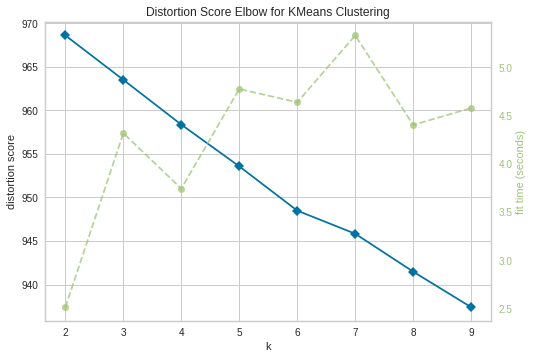

In [12]:
from yellowbrick.cluster import KElbowVisualizer

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
visualizer.fit(X)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

/usr/local/lib/python3.7/dist-packages/yellowbrick/utils/kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/usr/local/lib/python3.7/dist-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


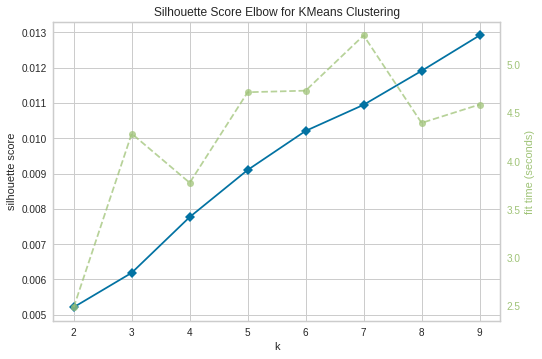

In [13]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette', timings= True)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [14]:
n_clusters = 3

def get_clusters_top_words(n_clusters):
    model = KMeans(n_clusters, init='k-means++', max_iter=400, n_init=5, random_state=2021)
    model.fit(X)
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()

    for i in range(n_clusters):
        print('Cluster %d:' % i),
        for ind in order_centroids[i, :5]:
            print(' %s' % terms[ind])

get_clusters_top_words(6)

Cluster 0:
 siguientes
 financiera
 administracion
 necesidades
 conocimiento
Cluster 1:
 derecho
 profesional
 salud
 carrera
 ofrece
Cluster 2:
 internacionales
 administracion
 empresas
 negocios
 organizaciones
Cluster 3:
 ingenieria
 sistemas
 procesos
 industrial
 soluciones
Cluster 4:
 acreditacion
 resolucion
 años
 calidad
 alta
Cluster 5:
 social
 comunicacion
 integral
 sociales
 periodismo


In [15]:
get_clusters_top_words(3)

Cluster 0:
 economia
 administracion
 internacionales
 empresas
 negocios
Cluster 1:
 social
 profesional
 integral
 comunicacion
 educacion
Cluster 2:
 ingenieria
 sistemas
 procesos
 diseño
 industrial


In [16]:
from collections import Counter

ngram_list = [pair for row in df['token_no_stopwords'] for pair in ngrams(row, 2)]
n_gram_2 = Counter(ngram_list).most_common()
n_gram_2 = pd.DataFrame.from_records(n_gram_2, columns=['gram', 'count'])
n_gram_2[:20]

,gram,count
0,"(nacional, internacional)",62
1,"(alta, calidad)",56
2,"(contaduria, publica)",40
3,"(administracion, empresas)",39
4,"(ingenieria, industrial)",35
5,"(negocios, internacionales)",34
6,"(ministerio, educacion)",31
7,"(responsabilidad, social)",30
8,"(economia, solidaria)",29
9,"(acreditacion, alta)",29


In [17]:
words = (df['token_no_stopwords'].apply(lambda x: ' '.join(x))).str.cat(sep=' ').split()
Counter(words).most_common(50)

[('social', 271),
 ('ingenieria', 214),
 ('profesional', 189),
 ('procesos', 160),
 ('integral', 138),
 ('calidad', 135),
 ('nacional', 131),
 ('capacidad', 122),
 ('empresas', 119),
 ('formar', 119),
 ('educacion', 117),
 ('forma', 117),
 ('competencias', 116),
 ('administracion', 116),
 ('sistemas', 116),
 ('comunicacion', 116),
 ('organizaciones', 114),
 ('investigacion', 113),
 ('sociedad', 113),
 ('internacional', 109),
 ('sociales', 109),
 ('necesidades', 108),
 ('conocimiento', 105),
 ('diseño', 103),
 ('ser', 102),
 ('problemas', 102),
 ('conocimientos', 100),
 ('internacionales', 97),
 ('informacion', 94),
 ('traves', 93),
 ('salud', 92),
 ('carrera', 88),
 ('gestion', 87),
 ('ciencias', 87),
 ('areas', 87),
 ('proyectos', 82),
 ('vida', 82),
 ('pais', 82),
 ('alta', 81),
 ('estudiantes', 79),
 ('trabajo', 79),
 ('economia', 78),
 ('derecho', 76),
 ('nivel', 75),
 ('mediante', 75),
 ('industrial', 75),
 ('humano', 71),
 ('asi', 71),
 ('ingeniero', 70),
 ('mas', 68)]


Topic Modeling LDA (Gensim), because once that you have the output from Ayoub's model 
you can explain the user/student similar careers or skills,
words, word clouds, universities that are align in that field


In [18]:
import re
data = df['token_no_stopwords'].str.join(' ').values.tolist()
data = [re.sub('\s+', ' ', sent) for sent in data] # Remove new line characters
data = [re.sub("\'", "", sent) for sent in data] # Remove distracting single quotes

In [19]:
'https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#6importnewsgroupsdata'

'https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#6importnewsgroupsdata'

In [23]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

In [24]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))
print(data_words[:1])

[['relaciona', 'economia', 'solidaria', 'criterios', 'politicos', 'investigativos', 'preparados', 'proyeccion', 'social', 'orientada', 'interaccion', 'conocimientos', 'teoricos', 'practicos', 'comunidades', 'academicas', 'mundiales']]


In [25]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[0]]])

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['relaciona', 'economia_solidaria', 'criterios_politicos_investigativos_preparados', 'proyeccion', 'social', 'orientada', 'interaccion', 'conocimientos', 'teoricos_practicos_comunidades', 'academicas_mundiales']


In [26]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in spanish_stopwords] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [27]:
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [28]:
!python -m spacy download es_core_news_sm

     |████████████████████████████████| 16.2 MB 4.0 MB/s 
  Created wheel for es-core-news-sm: filename=es_core_news_sm-2.2.5-py3-none-any.whl size=16172933 sha256=62ed9a8671f0f8bf159a0e5c9615058d034e3810676dfff4a00db11564bc7465
  Stored in directory: /tmp/pip-ephem-wheel-cache-xkrv7g_p/wheels/21/8d/a9/6c1a2809c55dd22cd9644ae503a52ba6206b04aa57ba83a3d8
Successfully built es-core-news-sm
✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')


In [29]:
import es_core_news_sm

# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = es_core_news_sm.load()

# Do lemmatization
data_lemmatized = lemmatization(data_words_bigrams)

print(data_lemmatized[:1])

[['relacionar', 'criterios_politicos', 'investigativos_preparados', 'orientar', 'conocimiento', 'teoricos_practicos', 'comunidad', 'academicas_mundiales']]


In [30]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [31]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:5]]

[[('academicas_mundiales', 1),
  ('comunidad', 1),
  ('conocimiento', 1),
  ('criterios_politicos', 1),
  ('investigativos_preparados', 1),
  ('orientar', 1),
  ('relacionar', 1),
  ('teoricos_practicos', 1)],
 [('contexto', 1),
  ('diferente', 1),
  ('efectivo', 1),
  ('estudiar', 1),
  ('juridico', 1),
  ('justar', 1),
  ('orden', 1),
  ('social', 1)],
 [('criterios_politicos', 1),
  ('ademar', 1),
  ('apoyar', 1),
  ('campo', 1),
  ('caracteristico', 1),
  ('cientifica', 1),
  ('comportamiento', 1),
  ('dejar', 1),
  ('disciplinar', 1),
  ('epistemica', 1),
  ('humanar', 1),
  ('interes', 1),
  ('lado', 1),
  ('mental', 1),
  ('partir', 1),
  ('pretender', 1),
  ('principalmente', 1),
  ('proponer', 1),
  ('psicologia', 1),
  ('psicosocial', 1),
  ('punto', 1),
  ('salud', 1),
  ('sujetar', 1),
  ('tornar', 1)],
 [('comunidad', 1),
  ('conocimiento', 1),
  ('criterios_politicos', 1),
  ('abogar', 1),
  ('administradores_justicia', 1),
  ('asesoramiento', 1),
  ('capacidad', 1),
  ('

In [32]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=7, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [33]:
best_model = None
top_score = 0
for x in range(4,15):
    print(f'Number of topics:{x}')
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=x, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    
    # Compute Perplexity
    print(f'Perplexity for {x} topics: {lda_model.log_perplexity(corpus)}')  # a measure of how good the model is. lower the better.

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f'Coherence Score for {x} topics: {coherence_lda} \n')
    if coherence_lda > top_score:
        best_model = x
        top_score = coherence_lda
print(f'\nBest Results with {best_model} topics with a Coherence of {top_score}')

Number of topics:4
Perplexity for 4 topics: -7.2533324721221915
Coherence Score for 4 topics: 0.4181100022819523 

Number of topics:5
Perplexity for 5 topics: -7.296349515066286
Coherence Score for 5 topics: 0.41217062409346755 

Number of topics:6
Perplexity for 6 topics: -7.315302015389428
Coherence Score for 6 topics: 0.38106082568445804 

Number of topics:7
Perplexity for 7 topics: -7.3447373014244866
Coherence Score for 7 topics: 0.3982367335794228 

Number of topics:8
Perplexity for 8 topics: -7.354154359627808
Coherence Score for 8 topics: 0.43944687314657904 

Number of topics:9
Perplexity for 9 topics: -7.384007461337375
Coherence Score for 9 topics: 0.44016811817914553 

Number of topics:10
Perplexity for 10 topics: -7.394078419518132
Coherence Score for 10 topics: 0.4180263402480778 

Number of topics:11
Perplexity for 11 topics: -7.394673569660143
Coherence Score for 11 topics: 0.42610466587057033 

Number of topics:12
Perplexity for 12 topics: -7.398435395158177
Coherence 

In [34]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                        id2word=id2word,
                                        num_topics=best_model, 
                                        random_state=100,
                                        update_every=1,
                                        chunksize=100,
                                        passes=10,
                                        alpha='auto',
                                        per_word_topics=True)

In [35]:
from pprint import pprint
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.033*"ingenieria" + 0.028*"proceso" + 0.027*"sistema" + '
  '0.022*"desarrollar" + 0.021*"industrial" + 0.020*"necesidad" + '
  '0.019*"conocimiento" + 0.019*"organización" + 0.016*"diseno" + '
  '0.015*"recurso"'),
 (1,
  '0.053*"social" + 0.037*"formar" + 0.027*"profesional" + 0.024*"capacidad" + '
  '0.018*"permitir" + 0.018*"integral" + 0.015*"problema" + 0.014*"capaz" + '
  '0.014*"ambiental" + 0.013*"solucionar"'),
 (2,
  '0.038*"estudiante" + 0.024*"producto" + 0.017*"problematicas" + '
  '0.016*"individual" + 0.016*"manejar" + 0.016*"humano" + 0.014*"local" + '
  '0.012*"producir" + 0.011*"estudiar" + 0.011*"reflexivo"'),
 (3,
  '0.022*"construir" + 0.020*"fisica" + 0.017*"idoneos" + 0.014*"accionar" + '
  '0.014*"obrar" + 0.013*"mayor" + 0.013*"natural" + 0.013*"principio" + '
  '0.013*"plantar" + 0.012*"quimica"'),
 (4,
  '0.048*"competencia" + 0.022*"analisis" + 0.016*"ejercicio" + '
  '0.014*"investigativa" + 0.014*"desarrollar" + 0.014*"cuidar" + '
  '0.013*"relac

In [36]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip /content/mallet-2.0.8.zip

--2021-11-04 21:30:04--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  15.8MB/s    in 1.0s    

2021-11-04 21:30:05 (15.8 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  /content/mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/te

In [37]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet('/content/mallet-2.0.8/bin/mallet', corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [38]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=20, step=1)

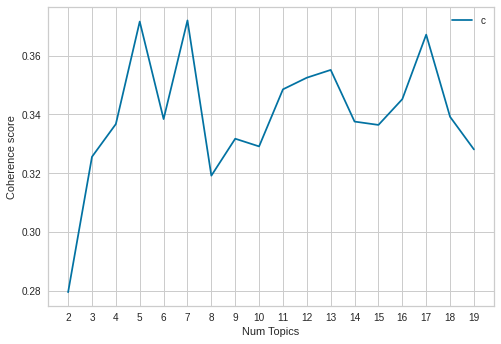

In [39]:
import matplotlib.pyplot as plt

# Show graph
limit=20; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.xticks(np.arange(start, limit, step=step))
plt.show()

In [67]:
optimal_model = model_list[3]

In [68]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,4.0,0.2739,"conocimiento, empresa, organización, ofrecer, ...",particularidades relaciona economia solidaria ...
1,1,0.0,0.2548,"desarrollar, competencia, relacionar, estudiar...",derecho estudia sistema juridico sera objeto d...
2,2,1.0,0.4444,"calidad, problema, carrera, disciplinar, profe...",psicologia ademas investigacion dimension psic...
3,3,4.0,0.3720,"conocimiento, empresa, organización, ofrecer, ...",derecho ofrece institucion identifica ciudadan...
4,4,0.0,0.4677,"desarrollar, competencia, relacionar, estudiar...",la organizacion entendida conjunto recursos c...
5,5,3.0,0.3433,"ingenieria, proceso, sistema, necesidad, indus...",medicina veterinaria zootecnia estudia relacio...
6,6,4.0,0.2739,"conocimiento, empresa, organización, ofrecer, ...",particularidades relaciona economia solidaria ...
7,7,1.0,0.2281,"calidad, problema, carrera, disciplinar, profe...",informacion gestion seguridad mediante arquite...
8,8,1.0,0.2834,"calidad, problema, carrera, disciplinar, profe...",medicina ofertado institucion certificados min...
9,9,0.0,0.2819,"desarrollar, competencia, relacionar, estudiar...",matematicas gran importancia sociedad contempo...


In [69]:
# Print the Keyword in the 5 topics
pprint(optimal_model.print_topics())
doc_lda = optimal_model[corpus]

[(0,
  '0.038*"desarrollar" + 0.033*"competencia" + 0.025*"relacionar" + '
  '0.020*"estudiar" + 0.019*"contexto" + 0.019*"practicar" + '
  '0.019*"estudiante" + 0.018*"ciencia" + 0.016*"cultural" + 0.014*"humano"'),
 (1,
  '0.026*"calidad" + 0.023*"problema" + 0.021*"carrera" + 0.021*"disciplinar" '
  '+ 0.021*"profesional" + 0.018*"humanar" + 0.018*"egresar" + 0.018*"vida" + '
  '0.017*"personar" + 0.017*"orientar"'),
 (2,
  '0.089*"social" + 0.071*"formar" + 0.027*"capaz" + 0.027*"permitir" + '
  '0.025*"capacidad" + 0.021*"profesional" + 0.021*"integral" + 0.018*"buscar" '
  '+ 0.015*"criticar" + 0.015*"trabajar"'),
 (3,
  '0.042*"ingenieria" + 0.038*"proceso" + 0.034*"sistema" + 0.033*"necesidad" '
  '+ 0.024*"industrial" + 0.020*"diseno" + 0.019*"proyecto" + '
  '0.018*"solucionar" + 0.018*"recurso" + 0.015*"nuevo"'),
 (4,
  '0.049*"conocimiento" + 0.029*"empresa" + 0.025*"organización" + '
  '0.021*"ofrecer" + 0.019*"alto" + 0.019*"ambiental" + 0.018*"areas" + '
  '0.018*"financ

In [70]:
df_final = df.merge(df_dominant_topic, how='inner', left_index=True, right_index=True)

In [71]:
df_final.pivot_table(index='final_cat', columns='Dominant_Topic', values='Document_No', aggfunc='count')

Dominant_Topic,0.0,1.0,2.0,3.0,4.0
final_cat,,,,,
ARTS AND DESIGN,2.0,4.0,3.0,3.0,4.0
BUSINESS,19.0,18.0,21.0,25.0,21.0
ENGINEERING,10.0,19.0,22.0,20.0,17.0
HEALTH & MEDICINE,7.0,5.0,5.0,7.0,3.0
HUMANITIES AND SOCIAL SCIENCE,20.0,20.0,14.0,22.0,23.0
MATH AND PHYSICAL SCIENCES,2.0,6.0,3.0,4.0,4.0
SPORTS AND PHYSICAL TRAIN,1.0,2.0,1.0,NaN,1.0


In [72]:
df_final.pivot_table(index='pregrado', columns='Dominant_Topic', values='Document_No', aggfunc='count').head(10)

Dominant_Topic,0.0,1.0,2.0,3.0,4.0
pregrado,,,,,
administracion de empresas,5.0,7.0,5.0,9.0,3.0
administracion de empresas a distancia y,NaN,1.0,NaN,NaN,NaN
administracion de empresas agropecuarias,NaN,1.0,NaN,NaN,NaN
administracion de empresas dual,NaN,NaN,NaN,1.0,NaN
administracion de empresas modalidad dual,NaN,NaN,NaN,NaN,1.0
administracion de empresas virtual,NaN,NaN,NaN,1.0,NaN
administracion de negocios,1.0,NaN,NaN,NaN,NaN
administracion de negocios internacionales,NaN,NaN,NaN,2.0,NaN
administracion en salud ocupacional,1.0,NaN,NaN,1.0,3.0
